Name: Ujjwol Bahadur Magar

University ID: 2331426

Set Paths for Dataset

In [ ]:
import os

data_dir = '/content/drive/MyDrive/Colab Notebooks/FruitinAmazon'
train_dir = os.path.join(data_dir, 'train')

Task 1: Data Understanding and Visualization:

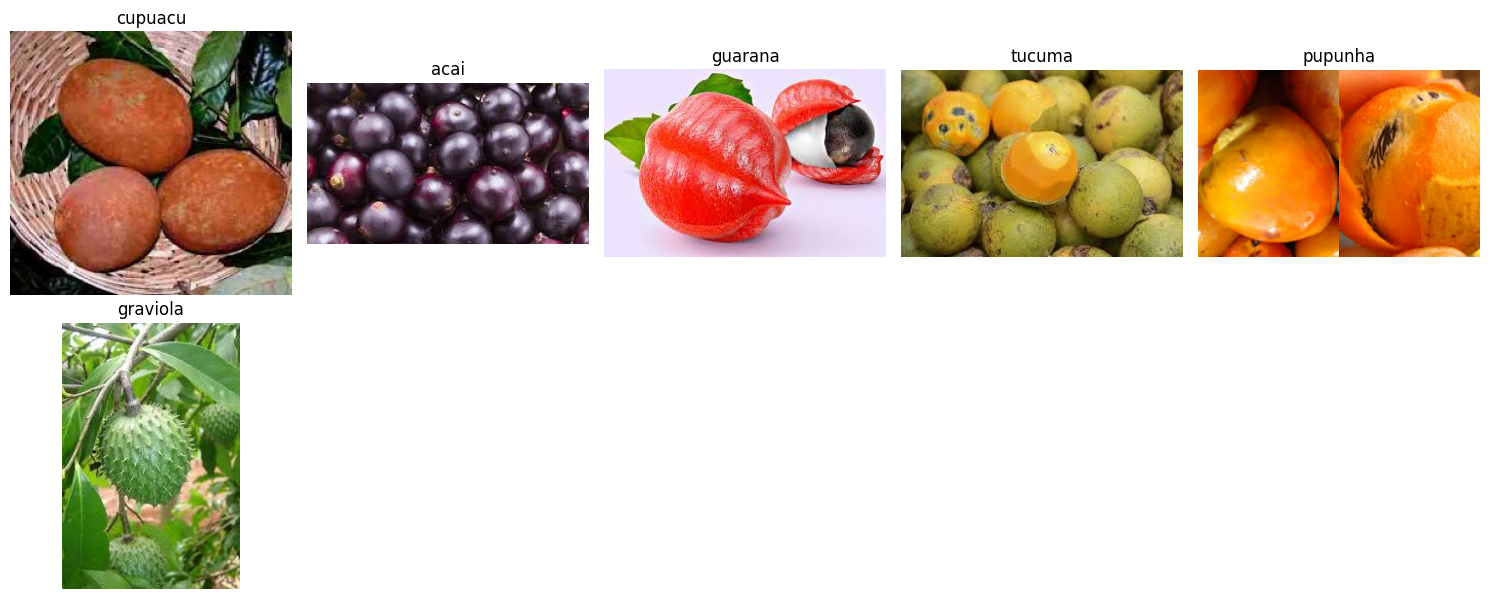

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

class_names = os.listdir(train_dir)
plt.figure(figsize=(15, 6))

for i, class_name in enumerate(class_names[:10]):  # show 10 classes max
    class_path = os.path.join(train_dir, class_name)
    image_file = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_file)
    img = Image.open(image_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

i observe the expected output

Check for Corrupted Image

In [ ]:
from PIL import UnidentifiedImageError

corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        try:
            img = Image.open(image_path)
            img.verify()
        except (IOError, SyntaxError, UnidentifiedImageError):
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No corrupted images found.")

No corrupted images found.


Task 2: Loading and Preprocessing Image Data in keras

In [ ]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2
seed = 123

# Normalization
rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset='training',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
).map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset='validation',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
).map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3 - Implement a CNN

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Preferred input layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer with num_classes
])

Task 4: Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Task 4: Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.1453 - loss: 1.9035

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 968ms/step - accuracy: 0.1437 - loss: 1.9266 - val_accuracy: 0.2222 - val_loss: 1.8752
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.4167 - loss: 1.6507

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 730ms/step - accuracy: 0.4062 - loss: 1.6567 - val_accuracy: 0.1667 - val_loss: 1.8407
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.1985 - loss: 1.6336

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.2079 - loss: 1.6251 - val_accuracy: 0.1667 - val_loss: 1.7686
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.3594 - loss: 1.4386

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 547ms/step - accuracy: 0.3633 - loss: 1.4316 - val_accuracy: 0.1667 - val_loss: 1.6939
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.6140 - loss: 1.1683

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 0.6202 - loss: 1.1703 - val_accuracy: 0.3333 - val_loss: 1.6148
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 527ms/step - accuracy: 0.8433 - loss: 0.9423 - val_accuracy: 0.3889 - val_loss: 1.7865
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 798ms/step - accuracy: 0.8767 - loss: 0.6990 - val_accuracy: 0.3333 - val_loss: 1.7460
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.8339 - loss: 0.5954

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 611ms/step - accuracy: 0.8407 - loss: 0.5826 - val_accuracy: 0.3889 - val_loss: 1.6129
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.9193 - loss: 0.3369 - val_accuracy: 0.1667 - val_loss: 1.6278
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9497 - loss: 0.2533

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 492ms/step - accuracy: 0.9518 - loss: 0.2518 - val_accuracy: 0.3333 - val_loss: 1.5128
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - accuracy: 0.9783 - loss: 0.1700 - val_accuracy: 0.4444 - val_loss: 1.8234
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.9783 - loss: 0.1213 - val_accuracy: 0.3333 - val_loss: 2.1410
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 614ms/step - accuracy: 1.0000 - loss: 0.0621 - val_accuracy: 0.1667 - val_loss: 2.4376
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 976ms/step - accuracy: 1.0000 - loss: 0.0485 - val_accuracy: 0.3333 - val_loss: 2.3162
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 462ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 0.4444 - val_loss: 2.7554
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - accuracy: 1.0000 - loss: 0.0473 - val_accuracy: 0.2778 - val_loss: 2.1728
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.1667 - val_lo

Task 5: Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.3333 - loss: 1.5128
Validation Loss: 1.5128
Validation Accuracy: 0.3333


Task 6: Save and Load the Model

In [ ]:
# Save
model.save("final_model.h5")

# Reload
loaded_model = tf.keras.models.load_model("final_model.h5")

# Evaluate Again
loaded_model.evaluate(val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.3333 - loss: 1.5128


[1.512758731842041, 0.3333333432674408]

Task 7: Predictions and Classification Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get test data
test_images = []
test_labels = []

for batch in val_ds:
    images, labels = batch
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

preds = loaded_model.predict(np.array(test_images))
predicted_labels = np.argmax(preds, axis=1)

print(classification_report(test_labels, predicted_labels, target_names=class_names, zero_division=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
              precision    recall  f1-score   support

     cupuacu       1.00      1.00      1.00         1
        acai       0.20      0.50      0.29         2
     guarana       0.00      0.00      0.00         3
      tucuma       0.50      0.60      0.55         5
     pupunha       0.20      0.25      0.22         4
    graviola       0.00      0.00      0.00         3

    accuracy                           0.33        18
   macro avg       0.32      0.39      0.34        18
weighted avg       0.26      0.33      0.29        18



Graphs showing the training and validation loss and accuracy

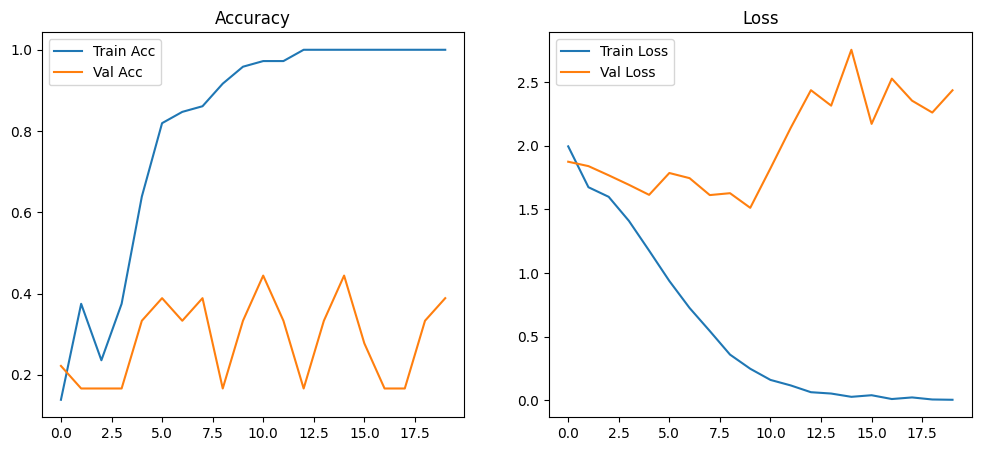

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()